In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

#x = np.array([1.2E6, 1.08E6, 9.6E5, 8.4E5, 7.2E5, 6.0E5, 4.8E5, 3.6E5, 2.4E5, 1.2E5])
#yT = np.array([0.1443, 0.1529, 0.1642, 0.1779, 0.1955, 0.2185, 0.2490, 0.2910, 0.3551, 0.4612])

#plt.plot(x,y)

#plt.xlabel('Absorption coefficient α' )
#plt.ylabel('Reflectivity')

#plt.show()

In [2]:
# Input
x = np.array([1.2E6, 1.08E6, 9.6E5, 8.4E5, 7.2E5, 6.0E5, 4.8E5, 3.6E5, 2.4E5, 1.2E5])

In [3]:
# Theoretical Calculations
n_i = 1.457
f_i = math.radians(66)
def R(a, f):
    l = 6.328E-7
    n_t = 1.332
    k = a * l / (4 * math.pi)
    A = ((n_t**2 - k**2) * math.cos(f))/n_i**2
    B = 2*n_t*k*math.cos(f)/n_i**2
    C = math.sin(f)**2 - (n_t**2 - k**2)/n_i**2 
    D = -2*n_t*k/n_i**2     
    X = (A**2 + B**2)**0.5      
    p = (C**2 + D**2)**0.5   
    P = 2**0.5 * (B*(p+C)**0.5+A*(p-C)**0.5)

    print(f"{k:.6f}|{A:.6f}|{B:.6f}|{C:.6f}|{D:.6f}|{X:.6f}|{p:.6f}|{P:.6f}")

    res = (X**2 + p - P)/(X**2 + p + P)

    return res

def I_out(a, f):
    n_a = 1
    f_1 = math.radians(36)
    f_2 = math.radians(23.79)
    f_3 = math.radians(21.21)
    f_4 = math.radians(31.81)
    
    res = \
        ((n_a * math.cos(f_4) * 2 * n_i * math.cos(f_3))/(n_i * math.cos(f_3) * n_a * math.cos(f_3) + n_i * math.cos(f_4))) * \
        ((n_i * math.cos(f_2) * 2 * n_a * math.cos(f_1))/(n_a * math.cos(f_1) * n_i * math.cos(f_1) + n_a * math.cos(f_2))) * \
        R(a, f)

    return res


In [4]:
# Theoretical Values
yT = list()
for xi in x:
    yT.append(I_out(xi, f_i))
yT = np.array(yT)
print()
print(yT)

0.060428|0.339241|0.030844|0.000510|-0.075832|0.340640|0.075834|0.143723
0.054385|0.339374|0.027759|0.000184|-0.068249|0.340507|0.068249|0.135485
0.048342|0.339493|0.024675|-0.000109|-0.060666|0.340388|0.060666|0.126948
0.042300|0.339597|0.021591|-0.000367|-0.053082|0.340283|0.053084|0.118044
0.036257|0.339688|0.018506|-0.000590|-0.045499|0.340192|0.045503|0.108684
0.030214|0.339765|0.015422|-0.000780|-0.037916|0.340115|0.037924|0.098733
0.024171|0.339828|0.012337|-0.000934|-0.030333|0.340052|0.030347|0.087992
0.018128|0.339877|0.009253|-0.001055|-0.022750|0.340003|0.022774|0.076126
0.012086|0.339912|0.006169|-0.001141|-0.015166|0.339968|0.015209|0.062502
0.006043|0.339933|0.003084|-0.001192|-0.007583|0.339947|0.007676|0.045625

[0.15266595 0.1621382  0.17385457 0.18852125 0.20717068 0.231384
 0.26373743 0.30881287 0.37593186 0.48910008]


In [5]:
# Experimental Values
yE = np.array([1.2, 1.4, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.6, 3])

In [6]:
i=0
ratios = list()
for xi in x: 
    ratio = yE[i]/yT[i]
    ratios.append(ratio)
    print(f"{i}: {xi} -> T:{yT[i]:.6f} == E:{yE[i]:.6f} Ratio:{ratio}") 
    i+=1

meanRatio = mean(ratios)
print(f"Mean ratio: {meanRatio}")

0: 1200000.0 -> T:0.152666 == E:1.200000 Ratio:7.86029898702822
1: 1080000.0 -> T:0.162138 == E:1.400000 Ratio:8.634609275338043
2: 960000.0 -> T:0.173855 == E:1.600000 Ratio:9.20309424085783
3: 840000.0 -> T:0.188521 == E:1.700000 Ratio:9.01755128993006
4: 720000.0 -> T:0.207171 == E:1.800000 Ratio:8.688488025242883
5: 600000.0 -> T:0.231384 == E:1.900000 Ratio:8.21145785145098
6: 480000.0 -> T:0.263737 == E:2.000000 Ratio:7.583299856009291
7: 360000.0 -> T:0.308813 == E:2.200000 Ratio:7.124055376159389
8: 240000.0 -> T:0.375932 == E:2.600000 Ratio:6.916146916472505
9: 120000.0 -> T:0.489100 == E:3.000000 Ratio:6.13371392085458
Mean ratio: 7.937271573934378


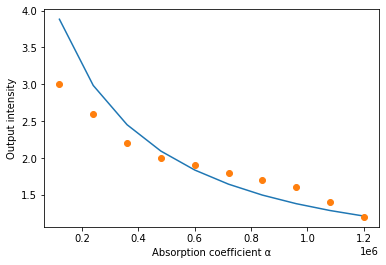

In [7]:
plt.plot(x,yT*meanRatio)
plt.plot(x,yE,'o')
#plt.plot(x,yE)
#plt.plot(x,yT)

plt.xlabel('Absorption coefficient α' )
plt.ylabel('Output intensity')

#plt.xscale("log")

plt.show()